In [55]:
import pandas as pd

df = pd.read_csv('fruits.csv')

df.head(10)


,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [56]:
from sklearn.model_selection import train_test_split

X = df[['Weight', 'Size']]
y = df['Class']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [88]:
#if classificaiton problem use classifer else use regressor
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()

dc.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [89]:
#training accuracy
dc.score(xTrain, yTrain)

1.0

In [90]:
#testing accuracy
dc.score(xTest, yTest)

1.0

In [91]:
#if training accuracy is more than tesing  accuracy then it is overfitting model
#if both the training score and test score are same then we dont have a problem it is not a overfitting problem
#even if the difference between training and testing is more it is overfitting(complex model)
#vice versa is underfitting model

[Text(0.5, 0.75, 'Size <= 4.97\ngini = 0.498\nsamples = 32\nvalue = [17, 15]\nclass = apple'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = orange'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = apple')]

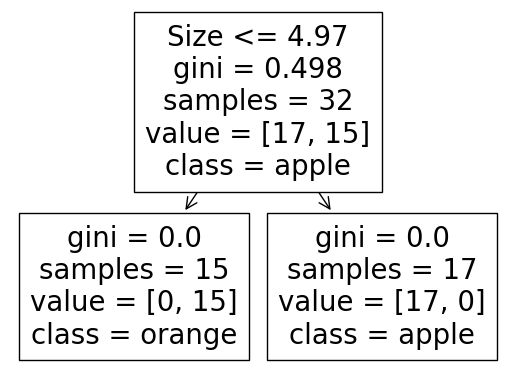

In [92]:
from sklearn.tree import plot_tree

#cannot be used for bigger problem
plot_tree(dc, feature_names=['Weight', 'Size'], class_names=['apple', 'orange'])

In [93]:
#by deafult it used gini as a gini index
#gini idnex is 0.49 
#x[1] is the threshold value i.e 4.97
#all that is less than threshold is left side of the tree and else it goes to right side of the tree

In [94]:
from sklearn.tree import export_text

print(export_text(dc, feature_names=['Weight', 'Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



In [95]:
#to check whichever is best gini or entropy we can use grid search cv
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(DecisionTreeClassifier(), param_grid={"criterion": ["gini", "entropy"]}, scoring="accuracy", cv=5)
model.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [96]:
model.best_estimator_

DecisionTreeClassifier()

In [97]:
model.score(xTest, yTest)

1.0

In [100]:
print(export_text(model.best_estimator_, feature_names=['Weight', 'Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



#new problem

In [105]:
df = pd.read_csv('BMI.csv')

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df[['Gender']])

/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
X = df[['Gender', 'Height', 'Weight']]
y = df['Index']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [108]:

dt = DecisionTreeClassifier()

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [110]:
gv = {
      'criterion': ['gini', 'entropy'],
      'max_depth': [2,3,4,5,6],
      'max_features': [1,2,3],
    }


model = GridSearchCV(dt, param_grid=gv, scoring='accuracy', cv=10, verbose=True)
model.fit(xTrain, yTrain)



Fitting 10 folds for each of 30 candidates, totalling 300 fits


/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy', verbose=True)

In [112]:
print(export_text(model.best_estimator_, feature_names=['Gender', 'Height', 'Weight']))

|--- Weight <= 105.50
|   |--- Weight <= 83.50
|   |   |--- Height <= 167.50
|   |   |   |--- Weight <= 63.50
|   |   |   |   |--- Height <= 152.00
|   |   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Weight >  57.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Height >  152.00
|   |   |   |   |   |--- Height <= 162.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Height >  162.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- Weight >  63.50
|   |   |   |   |--- Height <= 160.50
|   |   |   |   |   |--- Weight <= 66.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Weight >  66.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- Height >  160.50
|   |   |   |   |   |--- Weight <= 81.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Weight >  81.00
|   |   |   |   |   |   |--- class: 4
|   |   |--- Height >  167.50
|   |   |   |--- Weight <= 66.00
|   |   

In [113]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=3)

[Text(0.6223958333333334, 0.9285714285714286, 'x[2] <= 105.5\ngini = 0.739\nsamples = 400\nvalue = [9, 20, 54, 55, 108, 154]'),
 Text(0.4184027777777778, 0.7857142857142857, 'x[2] <= 83.5\ngini = 0.79\nsamples = 199\nvalue = [9, 20, 54, 50, 44, 22]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[1] <= 167.5\ngini = 0.742\nsamples = 119\nvalue = [9, 20, 49, 22, 17, 2]'),
 Text(0.1111111111111111, 0.5, 'x[2] <= 63.5\ngini = 0.699\nsamples = 57\nvalue = [1, 0, 19, 18, 17, 2]'),
 Text(0.05555555555555555, 0.35714285714285715, 'x[1] <= 152.0\ngini = 0.405\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'),
 Text(0.027777777777777776, 0.21428571428571427, 'x[2] <= 57.5\ngini = 0.408\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]'),
 Text(0.013888888888888888, 0.07142857142857142, 'gini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.041666666666666664, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.08333333333333333, 0.21428571428571427, 'x[1] <= 162

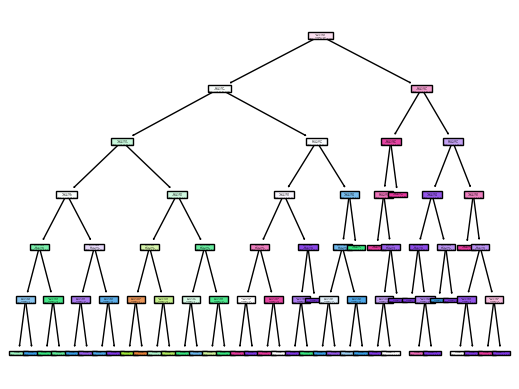

In [116]:
plot_tree(model.best_estimator_, filled=True)

[Text(0.6223958333333334, 0.9285714285714286, 'x[2] <= 105.5\ngini = 0.739\nsamples = 400\nvalue = [9, 20, 54, 55, 108, 154]'),
 Text(0.4184027777777778, 0.7857142857142857, 'x[2] <= 83.5\ngini = 0.79\nsamples = 199\nvalue = [9, 20, 54, 50, 44, 22]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[1] <= 167.5\ngini = 0.742\nsamples = 119\nvalue = [9, 20, 49, 22, 17, 2]'),
 Text(0.1111111111111111, 0.5, 'x[2] <= 63.5\ngini = 0.699\nsamples = 57\nvalue = [1, 0, 19, 18, 17, 2]'),
 Text(0.05555555555555555, 0.35714285714285715, 'x[1] <= 152.0\ngini = 0.405\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'),
 Text(0.027777777777777776, 0.21428571428571427, 'x[2] <= 57.5\ngini = 0.408\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]'),
 Text(0.013888888888888888, 0.07142857142857142, 'gini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.041666666666666664, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.08333333333333333, 0.21428571428571427, 'x[1] <= 162

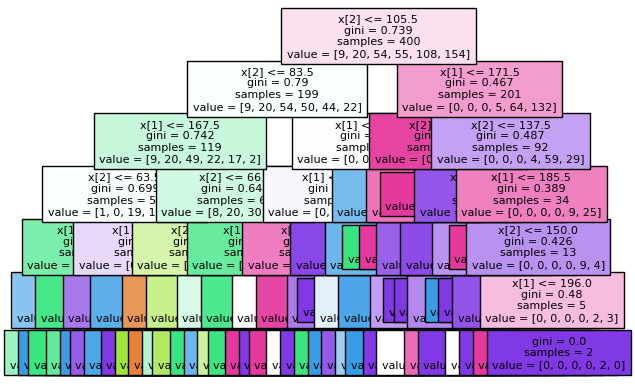

In [118]:
plot_tree(model.best_estimator_, fontsize=8, filled=True)